# Classification of Traffic Signs Using LeNet Architecture In Keras

#  Bharat Panwar

- In this case study, differnet images of traffic signs are classfied usubg Deep Network.
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# 1: IMPORTING LIBRARIES AND DATASET

In [111]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import warnings
warnings.filterwarnings("ignore")

In [155]:
# Reading Files (picture files Pascal)
with open(r"D:\FileHistory\Downloads\Udemy\P74-Project-5\Project 5\traffic-signs-data\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(r"D:\FileHistory\Downloads\Udemy\P74-Project-5\Project 5\traffic-signs-data\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"D:\FileHistory\Downloads\Udemy\P74-Project-5\Project 5\traffic-signs-data\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

# Split data into Train, Validation and Test

In [141]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [142]:
X_train.shape

(34799, 32, 32, 3)

In [143]:
y_train.shape

(34799,)

In [144]:
X_validation.shape

(4410, 32, 32, 3)

In [145]:
y_validation.shape

(4410,)

In [146]:
X_test.shape

(12630, 32, 32, 3)

In [147]:
y_test.shape

(12630,)

# 2: IMAGE EXPLORATION

2

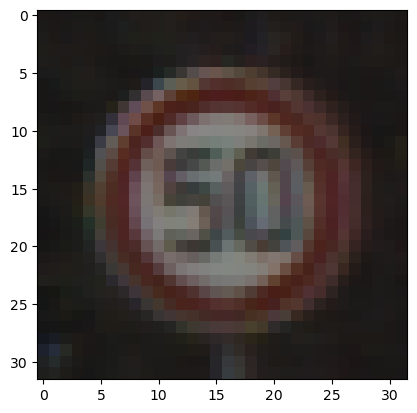

In [158]:
i = 1000
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# 3: DATA PEPARATION

In [149]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [150]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [151]:
X_train_gray.shape

(34799, 32, 32, 1)

In [152]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


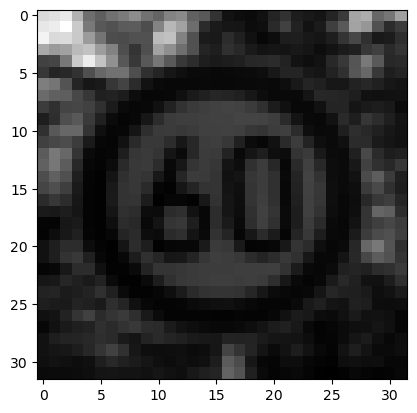

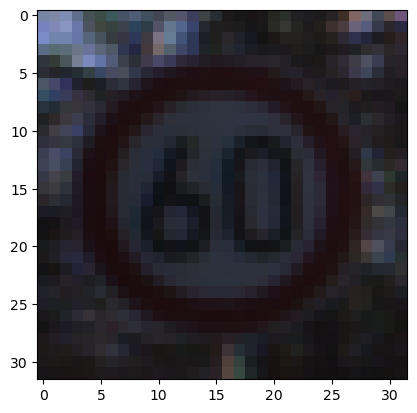

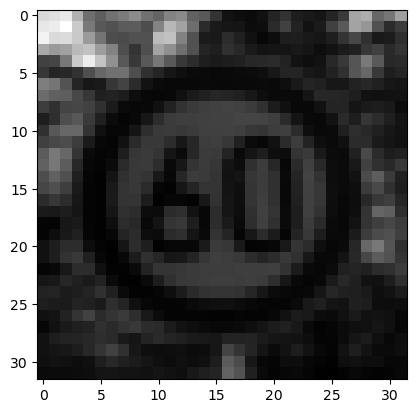

In [154]:
i = 100
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')


# 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [126]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [159]:
image_shape = X_train_gray[i].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [128]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [129]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001

# Create the Adam optimizer object
adam_optimizer = Adam(learning_rate=learning_rate)

In [130]:
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=adam_optimizer, 
                  metrics=['accuracy'])

In [131]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0931 - loss: 3.4819 - val_accuracy: 0.2488 - val_loss: 2.8696
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4020 - loss: 2.2398 - val_accuracy: 0.5460 - val_loss: 1.5429
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6704 - loss: 1.1327 - val_accuracy: 0.6955 - val_loss: 1.0488
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7880 - loss: 0.7452 - val_accuracy: 0.7503 - val_loss: 0.8316
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8454 - loss: 0.5673 - val_accuracy: 0.8100 - val_loss: 0.7281
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8811 - loss: 0.4456 - val_accuracy: 0.8016 - val_loss: 0.7006
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9021 - loss: 0.3762 - val_accuracy: 0.8327 - val_loss: 0.6485
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9122 - loss: 0.3335 - val_accuracy: 0.8179 - v

# STEP 5: MODEL EVALUATION

In [132]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8600


In [133]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

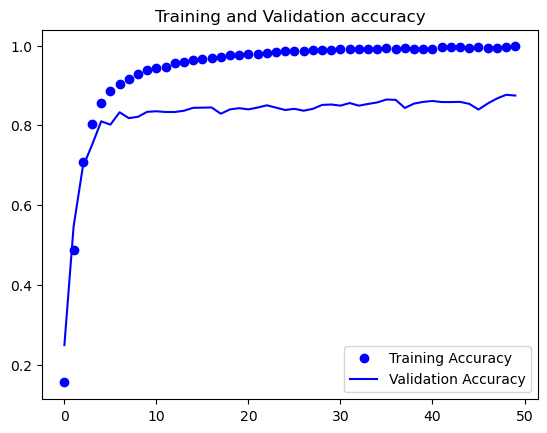

In [134]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


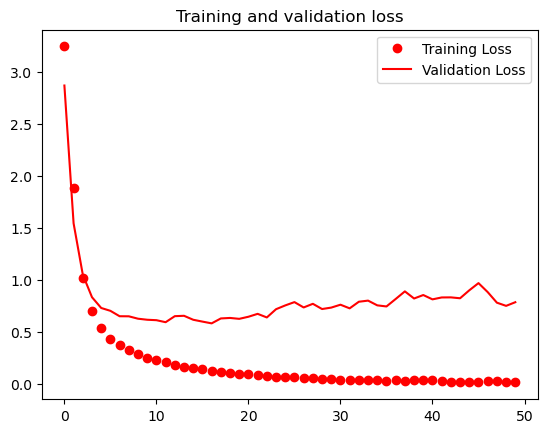

In [135]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

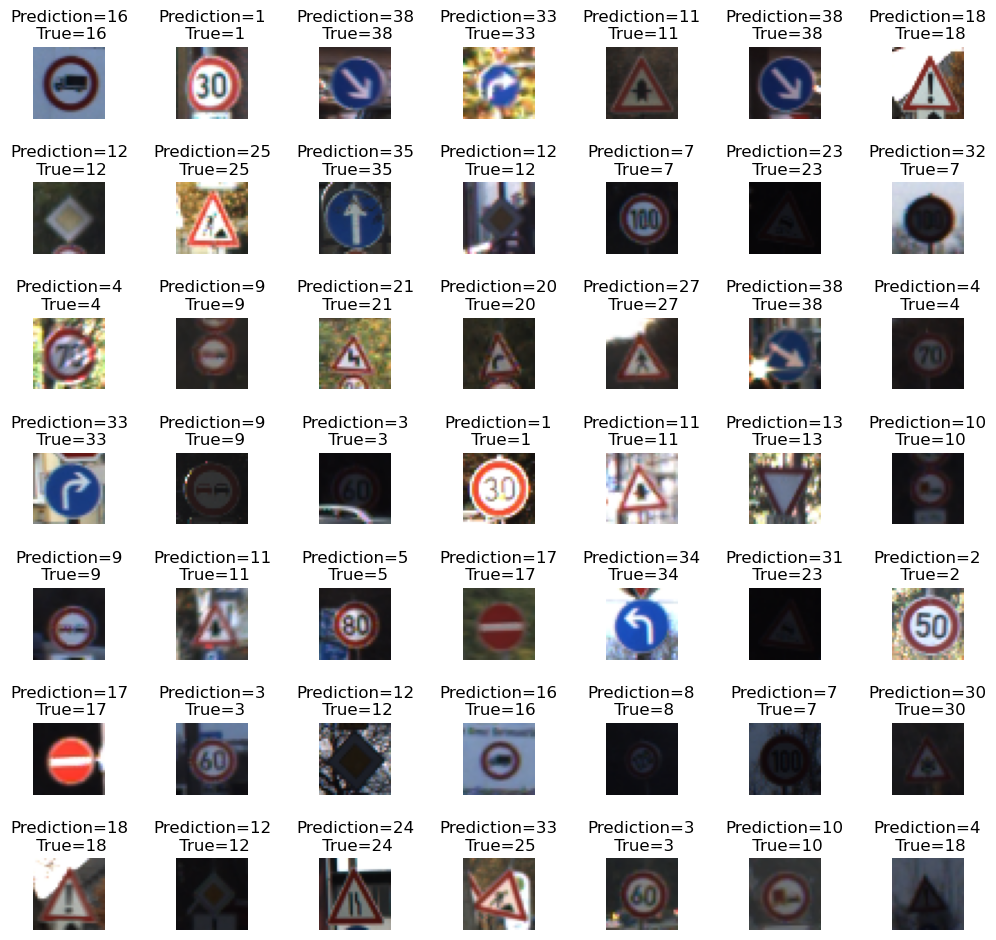

In [136]:
fig, axes = plt.subplots(7, 7, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0,49):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# Conclusion
Model is performing well on both validation and test.

In [137]:
cnn_model.save('traffic_sign_classifier.h5')

In [138]:
!pip install opencv-python

In [139]:
!pip install gradio


# Deployment

In [156]:
import gradio as gr
import numpy as np
from keras.models import load_model
import cv2

# Load the trained model
cnn_model = load_model('traffic_sign_classifier.h5')

# Function to preprocess the input image
def preprocess_image(image):
    # Resize to 32x32 as required by the model
    image = cv2.resize(image, (32, 32))
    # Convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalize the image
    image = (image - 128) / 128
    # Reshape the image to fit the input of the model
    image = image.reshape(1, 32, 32, 1)
    return image

# Function to make predictions
def predict_traffic_sign(image):
    # Preprocess the input image
    processed_image = preprocess_image(image)
    # Predict the class of the image using the model
    prediction = cnn_model.predict(processed_image)
    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)
    
    # Mapping of class numbers to their descriptions
    class_names = {
        0: 'Speed limit (20km/h)',
        1: 'Speed limit (30km/h)',
        2: 'Speed limit (50km/h)',
        3: 'Speed limit (60km/h)',
        4: 'Speed limit (70km/h)',
        5: 'Speed limit (80km/h)',
        6: 'End of speed limit (80km/h)',
        7: 'Speed limit (100km/h)',
        8: 'Speed limit (120km/h)',
        9: 'No passing',
        10: 'No passing for vehicles over 3.5 metric tons',
        11: 'Right-of-way at the next intersection',
        12: 'Priority road',
        13: 'Yield',
        14: 'Stop',
        15: 'No vehicles',
        16: 'Vehicles over 3.5 metric tons prohibited',
        17: 'No entry',
        18: 'General caution',
        19: 'Dangerous curve to the left',
        20: 'Dangerous curve to the right',
        21: 'Double curve',
        22: 'Bumpy road',
        23: 'Slippery road',
        24: 'Road narrows on the right',
        25: 'Road work',
        26: 'Traffic signals',
        27: 'Pedestrians',
        28: 'Children crossing',
        29: 'Bicycles crossing',
        30: 'Beware of ice/snow',
        31: 'Wild animals crossing',
        32: 'End of all speed and passing limits',
        33: 'Turn right ahead',
        34: 'Turn left ahead',
        35: 'Ahead only',
        36: 'Go straight or right',
        37: 'Go straight or left',
        38: 'Keep right',
        39: 'Keep left',
        40: 'Roundabout mandatory',
        41: 'End of no passing',
        42: 'End of no passing by vehicles over 3.5 metric tons'
    }
    
    # Return the predicted class name
    return class_names[predicted_class]

# Create the Gradio interface without the 'shape' argument
iface = gr.Interface(
    fn=predict_traffic_sign,  # The function to be called for prediction
    inputs=gr.Image(type="numpy", label="Upload a traffic sign image"),  # Input is an image
    outputs=gr.Textbox(label="Predicted Traffic Sign"),  # Output is a text label
    title="Traffic Sign Classifier",
    description="Upload an image of a traffic sign, and the model will predict its class."
)

# Launch the Gradio interface
iface.launch()


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
